# Lab Activity

### Importing

In [ ]:
pip install streamlit numpy scikt-learn

In [ ]:
import nltk
from nltk.corpus import reuters, stopwords
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import streamlit as st

In [ ]:
nltk.download('reuters')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package reuters to
[nltk_data]     C:\Users\salem\AppData\Roaming\nltk_data...
[nltk_data]   Package reuters is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\salem\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\salem\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\salem\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### 1) Load the Reuters Corpus

In [ ]:
corpus_sentences = []
for fileid in reuters.fileids():
    raw_text = reuters.raw(fileid)
    tokenized_sentence = [word for word in nltk.word_tokenize(raw_text) if word.isalnum() and word]
    corpus_sentences.append(tokenized_sentence)
print(f"Number of sentences in the Reuters corpus: {len(corpus_sentences)}")

Number of sentences in the Reuters corpus: 10788


### 2) Model training 

In [ ]:
model = Word2Vec(sentences=corpus_sentences, vector_size=100, window=5, min_count=5, workers=4)
# Print vocabulary size
print(f"Vocabulary size: {len(model.wv.index_to_key)}")

Vocabulary size: 12945


### 3) Extract Word embeddings for visualization 

In [ ]:
# Extract the learned word vectors and their corresponding words for visualization.
words = list(model.wv.index_to_key)[:200] # Limit to top 200 words for better visualization
word_vectors = np.array([model.wv[word] for word in words]) # Convert to NumPy array for compatibile

### 4) Reducing Dimensionality 

In [ ]:
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
word_vectors_2d = tsne.fit_transform(word_vectors)

 ### 5) Visualize the Word Embeddings

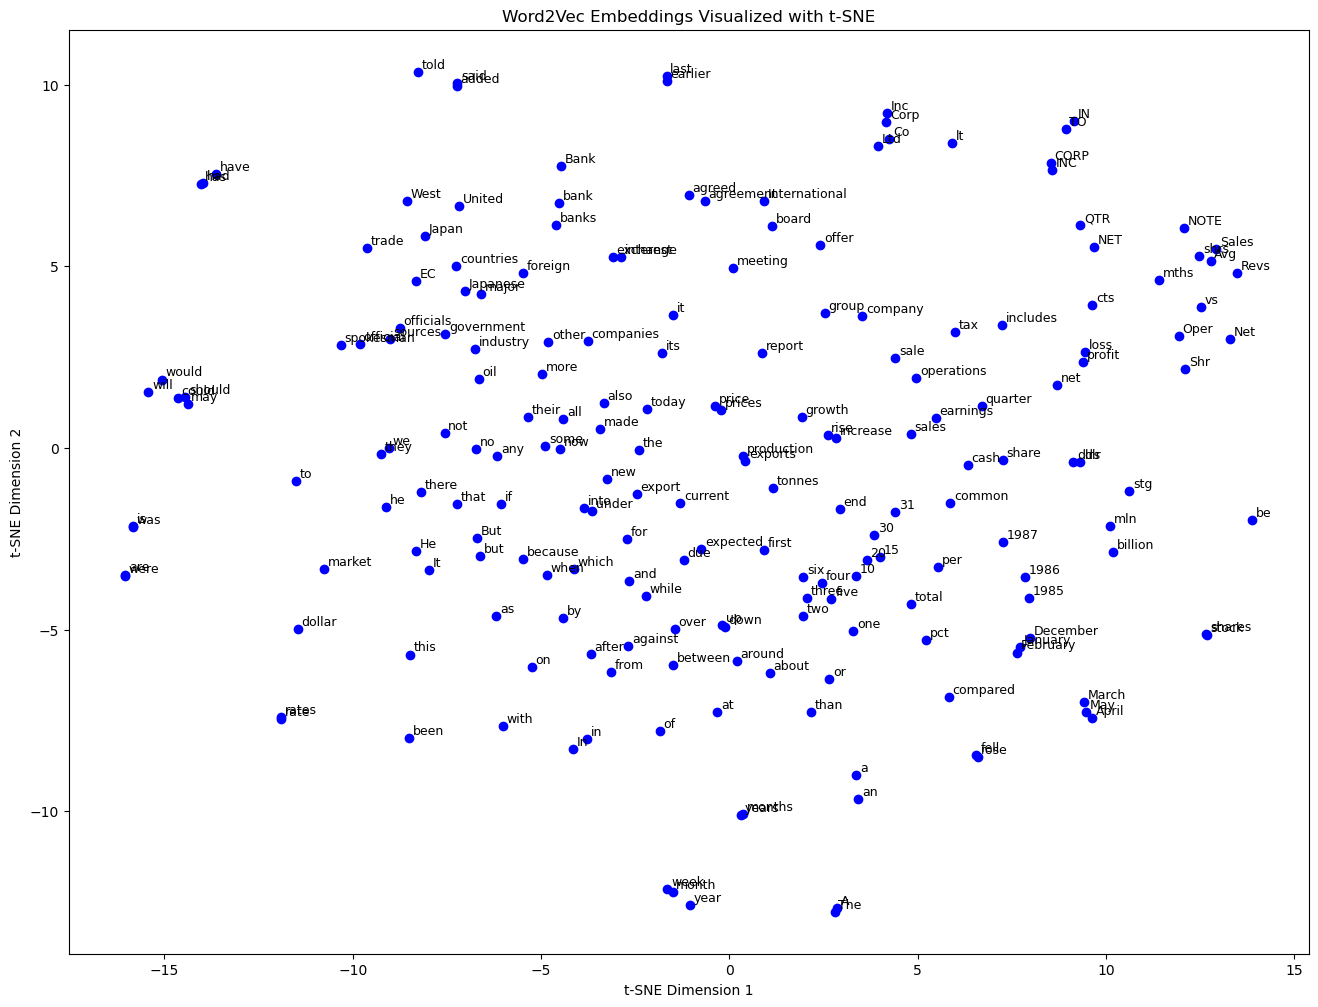

In [ ]:
def plot_embeddings(vectors, labels):
    plt.figure(figsize=(16, 12))
    for i, label in enumerate(labels):
        x, y = vectors[i]
        plt.scatter(x, y, color='blue')
        plt.text(x + 0.1, y + 0.1, label, fontsize=9)
    plt.title("Word2Vec Embeddings Visualized with t-SNE")
    plt.xlabel("t-SNE Dimension 1")
    plt.ylabel("t-SNE Dimension 2")
    plt.show()
plot_embeddings(word_vectors_2d, words)

# Key Questions for Students:

### What do you observe about the clusters in the t-SNE plot?

cluster represents groups of similar words as the words are close to each other share the similar meaning or context while other clusters that are far apart indicate a distinct semantic fields, dens clusters suggestes high similarty and oultilers might represent unique word.

### How do you think the choice of parameters (e.g., window size, vector size) affects the embeddings?

- smaller windows captures relationships while larger windows caputre broades semantic contexts
- smalller vectors may lack variation while larger vectors can capture more detail but risk overfitting.
- the larger training data and diverse in the datasets the more improvment in embedding quality 

### What are the limitations of using Word2Vec and t-SNE for NLP tasks? 

Word2Vec and t-SNE have limitations in NLP tasks. Word2Vec creates single embeddings for words, missing context and struggling with new word as it focuses on word-level semantics and depends heavily on train data while t-SNE can misrepresent distances, is sensitive to parameters, and struggles with large datasets, focusing more on local than global structures.

# Information Retreival Task:

In [ ]:
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from scipy.spatial.distance import cosine

# Preprocess the text by tokenizing and removing stopwords
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text.lower())
    return [word for word in tokens if word.isalnum() and word not in stop_words]

# Compute the average embedding for a list of tokens
def compute_embedding(tokens, word2vec_model):
    vectors = [word2vec_model.wv[word] for word in tokens if word in word2vec_model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(word2vec_model.vector_size)

# Compute cosine similarity between two vectors
def calculate_similarity(vec1, vec2):
    if not np.any(vec1) or not np.any(vec2):  # Check for zero vectors
        return 0.0
    return 1 - cosine(vec1, vec2)

# Retrieve top N relevant documents based on similarity scores
def get_top_documents(query, model, documents, top_n=5):
    query_tokens = preprocess_text(query)
    query_vector = compute_embedding(query_tokens, model)

    similarity_scores = []
    for doc_id, doc_tokens in enumerate(documents):
        doc_vector = compute_embedding(doc_tokens, model)
        similarity = calculate_similarity(query_vector, doc_vector)
        similarity_scores.append((doc_id, similarity))
    
    # Sort by similarity score in descending order
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    return similarity_scores[:top_n]

# Example usage
query = "stock market"
top_n = 5

# Assume `model` is the Word2Vec model and `corpus_sentences` is the list of tokenized documents
top_results = get_top_documents(query, model, corpus_sentences, top_n)

# Display results
print(f"\nTop {len(top_results)} most relevant documents for query '{query}':")
for doc_id, similarity in top_results:
    doc_preview = ' '.join(corpus_sentences[doc_id][:10]) + '...'
    print(f"\nDocument ID: {doc_id}")
    print(f"Similarity Score: {similarity:.4f}")
    print(f"Document Preview: {doc_preview}")



Top 5 most relevant documents for query 'stock market':

Document ID: 8461
Similarity Score: 0.7505
Document Preview: ICCO delegates accept principles of buffer stock compromise as negotiation...

Document ID: 1959
Similarity Score: 0.7194
Document Preview: ICCO buffer stock manager to buy tonnes cocoa Monday June...

Document ID: 1551
Similarity Score: 0.7189
Document Preview: ICCO buffer stock manager to buy tonnes cocoa Wednesday June...

Document ID: 1346
Similarity Score: 0.7160
Document Preview: ICCO buffer stock manager to buy tonnes cocoa Tuesday June...

Document ID: 1485
Similarity Score: 0.7020
Document Preview: ICCO BUYS TONNES COCOA FOR BUFFER STOCK The International Cocoa...
